In [80]:
import pandas as pd
import numpy as np


chronic_df=pd.read_csv('/content/kidney_disease.csv')
chronic_df.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [81]:
#lets change colmn names

chronic_df.columns = ['id','age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells',
                      'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea',
                      'serum creatinine', 'sodium', 'potassium','haemoglobin','packed_cell_volume','white_blood_cell_count',
                      'red_blood_cell_count','hypertension', 'diabetes_mellitus',
                      'coronary_artery_disease', 'appetite', 'peda_edema', 'anemia', 'class']

In [82]:
chronic_df.columns.tolist()

['id',
 'age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'blood_glucose_random',
 'blood_urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'anemia',
 'class']

In [83]:
chronic_df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [84]:
chronic_df.drop(labels='id',axis=1,inplace=True)

In [85]:
#1. Categorical colmn like specific grav,alubmin and sugar are in float, so convert back to categorical again
chronic_df[['specific_gravity','albumin','sugar']]=chronic_df[['specific_gravity','albumin','sugar']].astype('object')

In [86]:
chronic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    object 
 3   albumin                  354 non-null    object 
 4   sugar                    351 non-null    object 
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [87]:
#convert packed_cell_vol,counts of wbc and rbc from obj into numeric
chronic_df['packed_cell_volume']=pd.to_numeric(chronic_df['packed_cell_volume'],errors='coerce')
chronic_df['red_blood_cell_count']=pd.to_numeric(chronic_df['red_blood_cell_count'],errors='coerce')
chronic_df['white_blood_cell_count']=pd.to_numeric(chronic_df['white_blood_cell_count'],errors='coerce')

In [88]:
#list comprehension
#Extracting categorical and numerical colmns
cat_col=[col for col in chronic_df if chronic_df[col].dtype=='object']
num_col=[col for col in chronic_df if chronic_df[col].dtype!='object']

In [89]:
cat_col

['specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'anemia',
 'class']

In [90]:
num_col

['age',
 'blood_pressure',
 'blood_glucose_random',
 'blood_urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [91]:
#by looping and looking at unique values in categorical colmns
for col in cat_col:
    print(f"{col} has {chronic_df[col].unique()} values\n")

specific_gravity has [1.02 1.01 1.005 1.015 nan 1.025] values

albumin has [1.0 4.0 2.0 3.0 0.0 nan 5.0] values

sugar has [0.0 3.0 4.0 1.0 nan 2.0 5.0] values

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

anemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [92]:
#replace incorrect val like '\tno,\tyes,'yes','\tno'...in cat_cols
chronic_df['diabetes_mellitus'].replace({'yes':'yes','\no':'no','\yes':'yes'},inplace=True)
chronic_df['coronary_artery_disease'].replace({'\no':'no'},inplace=True)
chronic_df['class'].replace({'ckd\t':'ckd'},inplace=True)

<ipython-input-92-d92dfb0f40f0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chronic_df['diabetes_mellitus'].replace({'yes':'yes','\no':'no','\yes':'yes'},inplace=True)
<ipython-input-92-d92dfb0f40f0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

In [93]:
#1convert target col class into 0(chronic kidney) & 1(not chronic kidney)
chronic_df['class']=chronic_df['class'].map({'ckd':0,'notckd':1})


In [94]:
#2convert target col class into numeric to check correlation
chronic_df['class'] = pd.to_numeric(chronic_df['class'], errors='coerce')

In [95]:
chronic_df['class'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 400 entries, 0 to 399
Series name: class
Non-Null Count  Dtype
--------------  -----
400 non-null    int64
dtypes: int64(1)
memory usage: 3.3 KB


In [96]:
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,0
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0


In [53]:
cat_col

['specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'anemia',
 'class']

# EDA for Numeric Data


<Figure size 2000x1200 with 0 Axes>

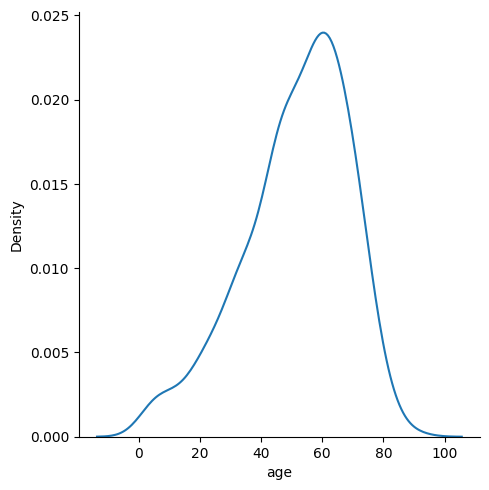

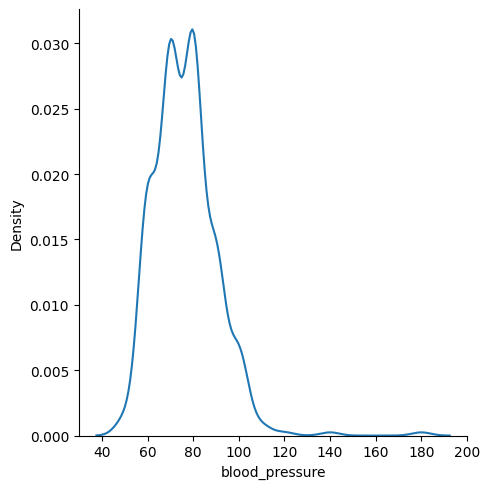

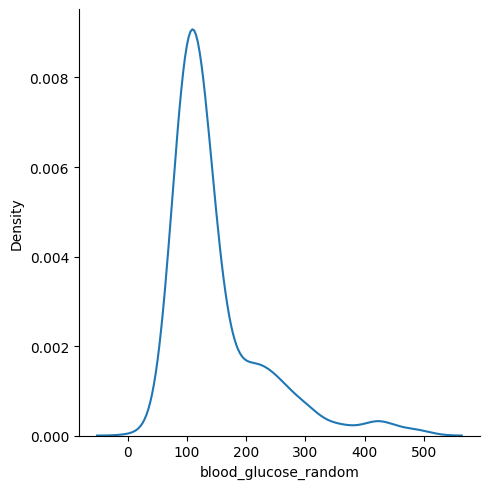

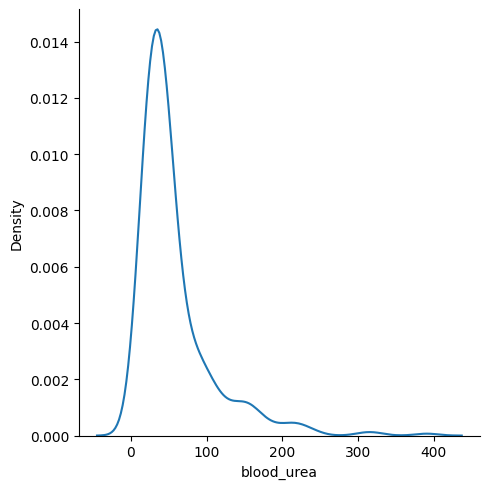

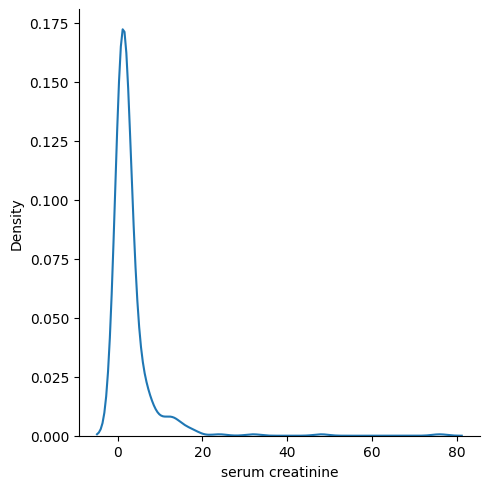

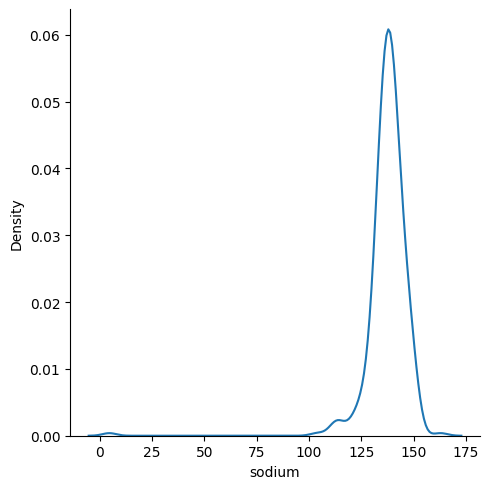

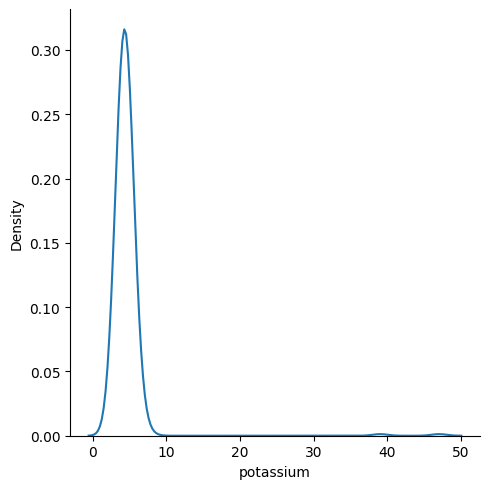

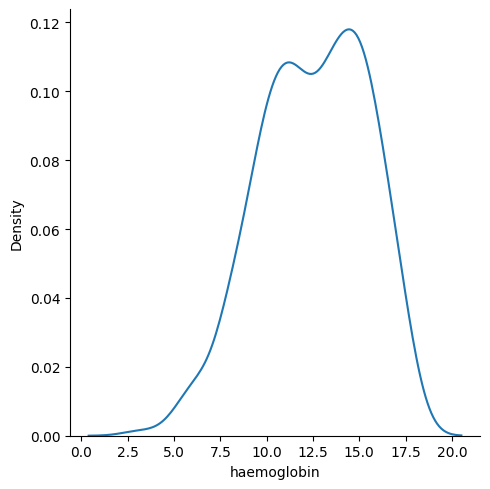

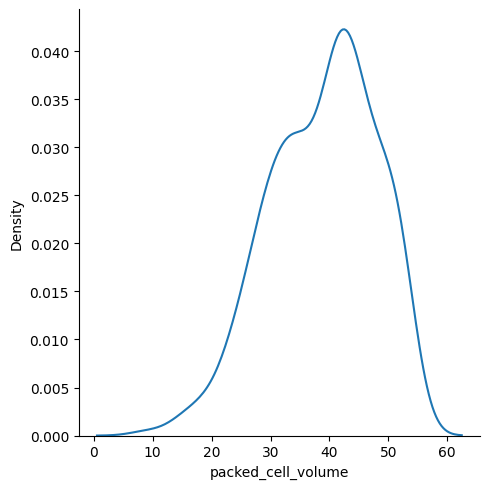

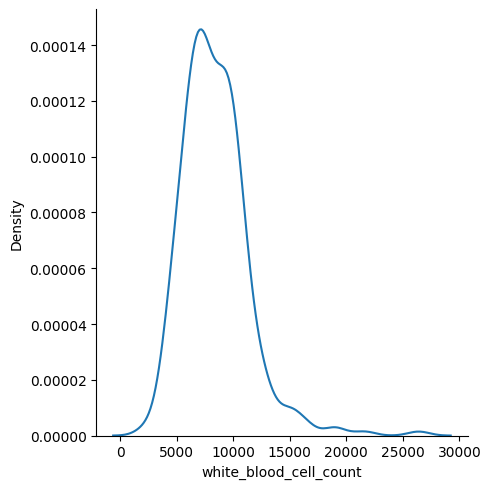

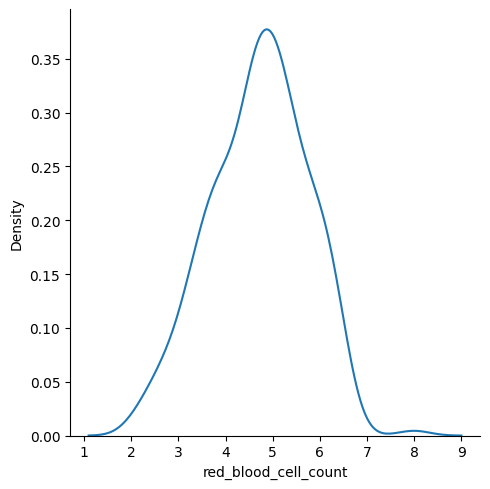

In [19]:
#check numerical features distrbution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,12))

#looping over num cols and checking its distribution

for col in num_col:
  sns.displot(chronic_df[col],kind='kde')

  #kde is kernel for distribution plot,we get curve,else bars we would get


<ipython-input-97-b7014d548138>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=chronic_df, x=col,ax=ax, palette='Set2')
<ipython-input-97-b7014d548138>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=chronic_df, x=col,ax=ax, palette='Set2')
<ipython-input-97-b7014d548138>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=chronic_df, x=col,ax=ax, palette='Set2')
<ipython-input-97-b7014d548138>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` varia

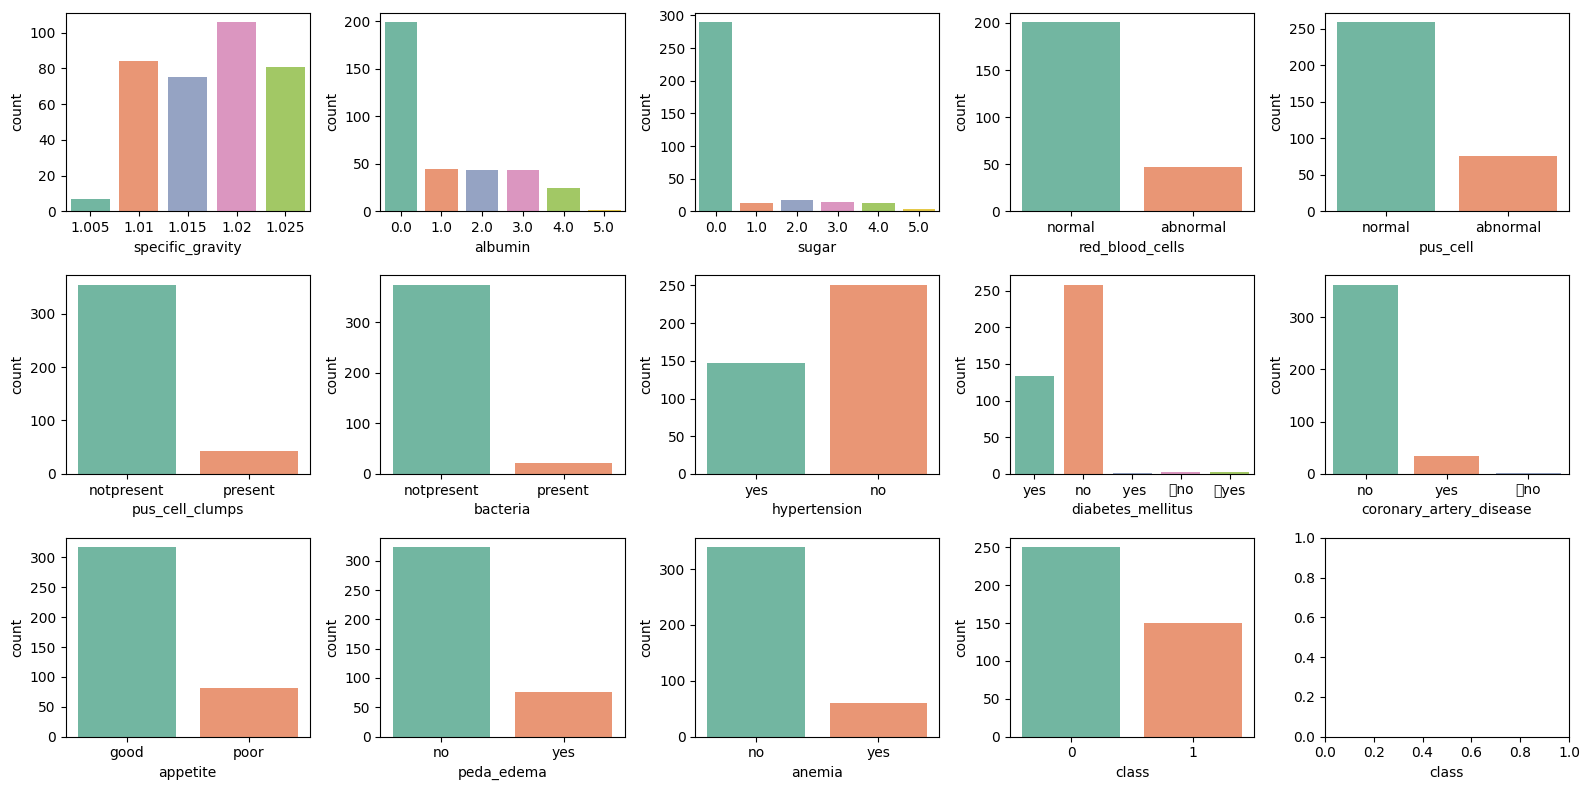

In [97]:
#lets check categorical dist
# we can visualize countplots max
fig,axes=plt.subplots(3,5,figsize=(16,8))
axes=axes.ravel() #flattening the array makes indexing easier
for col,ax in zip(cat_col,axes):
    sns.countplot(data=chronic_df, x=col,ax=ax, palette='Set2')
    plt.xlabel(col)
    fig.tight_layout()


In [98]:
chronic_df[['class']]

,class
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,1


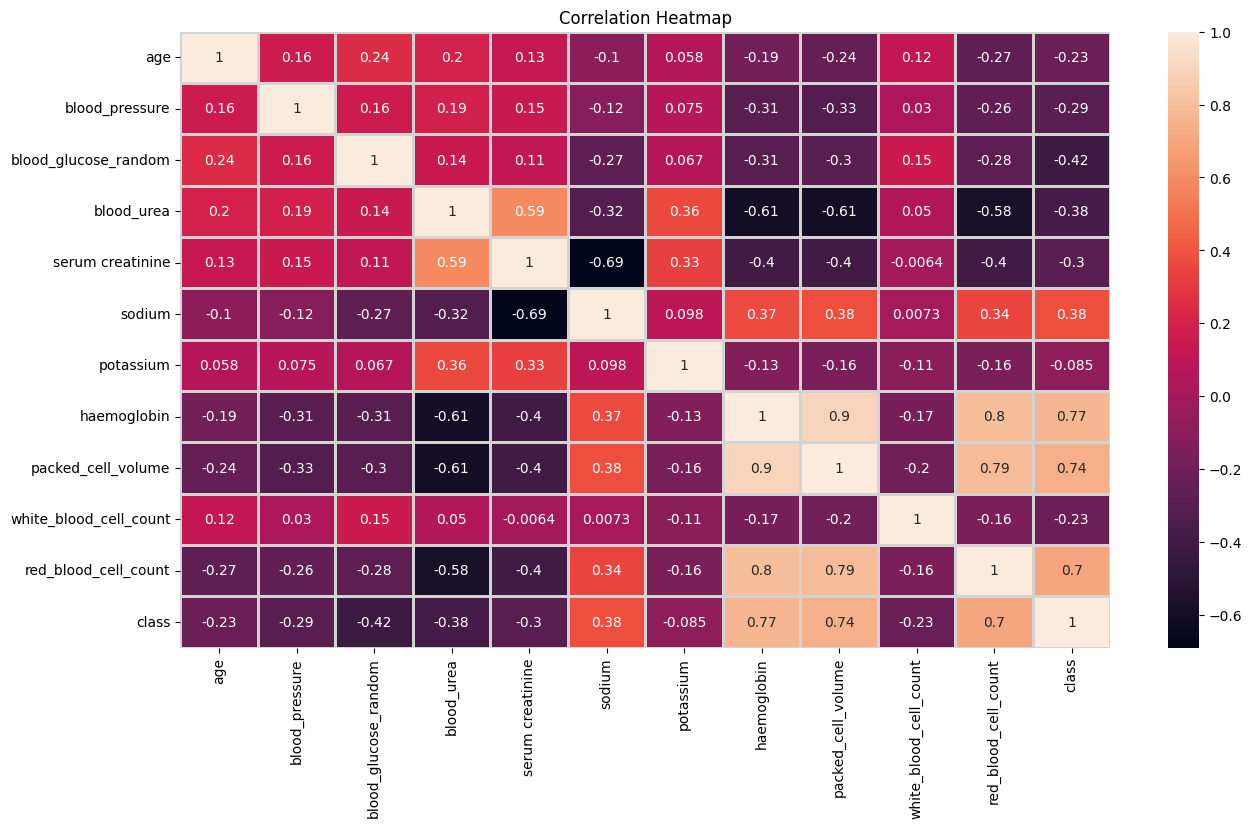

In [101]:
#correlation matrix: heatmap

plt.figure(figsize=(15, 8))
sns.heatmap(chronic_df.select_dtypes(include='number').corr(), annot=True, linewidths=2, linecolor='lightgrey')
plt.title("Correlation Heatmap")
plt.show()

#most correlated feature is Class: -ve BGR: -0.42 will get effected by ckd and +ve  Haemoglobin will also be suffered same

In [102]:
#lets check null values
chronic_df.isnull().sum().sort_values(ascending=False)

,0
red_blood_cells,152
red_blood_cell_count,131
white_blood_cell_count,106
potassium,88
sodium,87
packed_cell_volume,71
pus_cell,65
haemoglobin,52
sugar,49
specific_gravity,47


In [119]:
#lets check for numerical colms

chronic_df[num_col].isnull().sum()

,0
age,9
blood_pressure,12
blood_glucose_random,44
blood_urea,19
serum creatinine,17
sodium,87
potassium,88
haemoglobin,52
packed_cell_volume,71
white_blood_cell_count,106


In [118]:
#lly for cat_col

chronic_df[cat_col].isnull().sum()

,0
specific_gravity,47
albumin,46
sugar,49
red_blood_cells,152
pus_cell,65
pus_cell_clumps,4
bacteria,4
hypertension,2
diabetes_mellitus,2
coronary_artery_disease,2


# Missing Value Treatemts

In [124]:
#filling null values, we use 2 methds, random smapling forhigher null values in a colmn and Man/mode for low null values

#for num_col we use random sample
def random_val_imputation(feature):
    # 1. Count how many values are missing
    n_missing = chronic_df[feature].isnull().sum()

    # 2. Take a random sample from the values that are NOT missing
    random_sample = chronic_df[feature].dropna().sample(n_missing, replace=True, random_state=42)

    # 3. Set the sample’s index to the same as the missing value rows
    random_sample.index = chronic_df[chronic_df[feature].isnull()].index

    # 4. Replace the missing values with the random sample
    chronic_df.loc[chronic_df[feature].isnull(), feature] = random_sample

#for cat_cal we use 2nd method, mean/mode

def impute_mode(feature):
  mode= chronic_df[feature].mode()[0]
  chronic_df[feature]=chronic_df[feature].fillna(mode)

In [125]:
#filling num_col null values using sampling method
for val in num_col:
  random_val_imputation(val)

In [126]:
chronic_df[num_col].isna().sum()

,0
age,0
blood_pressure,0
blood_glucose_random,0
blood_urea,0
serum creatinine,0
sodium,0
potassium,0
haemoglobin,0
packed_cell_volume,0
white_blood_cell_count,0


In [127]:
# fill rbc and puss celss too using random sampling

random_val_imputation('red_blood_cells')
random_val_imputation('pus_cell')

In [131]:
chronic_df[cat_col].isna().sum()

,0
specific_gravity,0
albumin,0
sugar,0
red_blood_cells,0
pus_cell,0
pus_cell_clumps,0
bacteria,0
hypertension,0
diabetes_mellitus,0
coronary_artery_disease,0


In [130]:
# filling cat_cols with mode imputation

for col in cat_col:
  impute_mode(col)

<ipython-input-124-61fd12da6d37>:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  chronic_df[feature]=chronic_df[feature].fillna(mode)


In [132]:
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,308.0,...,38.0,6000.0,3.9,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,3.4,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0


In [133]:
#check unique val in each cat col by looping over cat cols

for col in cat_col:
  print(f"{col} has {chronic_df[col].nunique()} categories\n")

specific_gravity has 5 categories

albumin has 6 categories

sugar has 6 categories

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 5 categories

coronary_artery_disease has 3 categories

appetite has 2 categories

peda_edema has 2 categories

anemia has 2 categories

class has 2 categories



# Label Encoding

In [134]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for col in cat_col[3:]:
  chronic_df[col]=le.fit_transform(chronic_df[col])

In [135]:
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,308.0,...,38.0,6000.0,3.9,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,3.4,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,3,1,0,0,0,0


# Train test Split

In [155]:
x = chronic_df.drop('class',axis=1)
y=chronic_df['class']

In [156]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

# Model building

In [157]:
# import kneighborsclassifier, accuracy_score,confusion_matrix,classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

knn= KNeighborsClassifier()
knn.fit(x_train,y_train)
#accuracy_score,confusion matrix and classification report of Knn
knn_acc=accuracy_score(y_test,knn.predict(x_test))
print(knn_acc)

print(f"Training Accuracy of KNN is {accuracy_score(y_train,knn.predict(x_train))}")
print(f"Test Accuracy of KNN is{knn_acc} \n")

print(f"confusion Mstrix : \n{confusion_matrix(y_test,knn.predict(x_test))}\n")
print(f"classification Report : \n{classification_report(y_test,knn.predict(x_test))}")

0.675
Training Accuracy of KNN is 0.7928571428571428
Test Accuracy of KNN is0.675 

confusion Mstrix : 
[[49 23]
 [16 32]]

classification Report : 
              precision    recall  f1-score   support

           0       0.75      0.68      0.72        72
           1       0.58      0.67      0.62        48

    accuracy                           0.68       120
   macro avg       0.67      0.67      0.67       120
weighted avg       0.69      0.68      0.68       120



In [158]:
# import decisiontreeclassifier
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

#accuracy_score,confusion matrix and classification report of Knn

dtc_acc=accuracy_score(y_test,dtc.predict(x_test))
print(dtc_acc)

print(f"Training Accuracy of dtc is {accuracy_score(y_train,dtc.predict(x_train))}")
print(f"Test Accuracy of dtc is{dtc_acc} \n")

print(f"confusion Mstrix : \n{confusion_matrix(y_test,dtc.predict(x_test))}\n")
print(f"classification Report : \n{classification_report(y_test,dtc.predict(x_test))}")

0.9666666666666667
Training Accuracy of dtc is 1.0
Test Accuracy of dtc is0.9666666666666667 

confusion Mstrix : 
[[71  1]
 [ 3 45]]

classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.98      0.94      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.97       120
weighted avg       0.97      0.97      0.97       120



DO Hyperparamegter tuniing of dtc, import gridsearchcv

In [159]:
# Hyperparameter tuning of Decision Tree using GridSearchCV

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'splitter': ['best', 'random'],
    'min_samples_leaf': [1, 2, 3, 5, 7],
    'min_samples_split': [1, 2, 3, 5, 7],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Apply GridSearchCV
grid_search_dtc = GridSearchCV(dtc, grid_param, cv=5, n_jobs=-1, verbose=1)

# Fit on training data
grid_search_dtc.fit(x_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
2800 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/u

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [160]:
 #Print best parameters and best score in GridSearchCV for Decision Tree
print(grid_search_dtc.best_params_)

print(grid_search_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.9964285714285716


In [161]:
#accuracy_score,confusion matrix and classification report of Knn

dtc=grid_search_dtc.best_estimator_

dtc_acc=accuracy_score(y_test,dtc.predict(x_test))
print(dtc_acc)

print(f"Training Accuracy of dtc is {accuracy_score(y_train,dtc.predict(x_train))}")
print(f"Test Accuracy of dtc is{dtc_acc} \n")

print(f"confusion Mstrix : \n{confusion_matrix(y_test,dtc.predict(x_test))}\n")
print(f"classification Report : \n{classification_report(y_test,dtc.predict(x_test))}")

0.975
Training Accuracy of dtc is 0.9892857142857143
Test Accuracy of dtc is0.975 

confusion Mstrix : 
[[72  0]
 [ 3 45]]

classification Report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.94      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [167]:
# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(
    criterion='entropy',
    max_depth=11,
    max_features='sqrt',   # ✅ changed from 'auto' to 'sqrt'
    min_samples_leaf=2,
    min_samples_split=3,
    n_estimators=130
)
rd_clf.fit(x_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rf_acc = accuracy_score(y_test, rd_clf.predict(x_test))

print(f"Training Accuracy of rfc is {accuracy_score(y_train, rd_clf.predict(x_train))}")
print(f"Test Accuracy of rfc is {rf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(x_test))}\n")
print(f"Classification Report :- \n{classification_report(y_test, rd_clf.predict(x_test))}")


Training Accuracy of rfc is 0.9964285714285714
Test Accuracy of rfc is 0.9833333333333333 

Confusion Matrix :- 
[[72  0]
 [ 2 46]]

Classification Report :- 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [165]:
# import LGBM classifier
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(x_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier
etc_acc = accuracy_score(y_test, lgbm.predict(x_test))

print(f"Training Accuracy of lightbm c is {accuracy_score(y_train, lgbm.predict(x_train))}")
print(f"Test Accuracy of lightbm c is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, lgbm.predict(x_test))}\n")
print(f"Classification Report :- \n{classification_report(y_test, lgbm.predict(x_test))}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 102, number of negative: 178
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 519
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364286 -> initscore=-0.556811
[LightGBM] [Info] Start training from score -0.556811
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [169]:
import pandas as pd

# Assuming these accuracy scores are already calculated
# Replace knn_acc, dtc_acc, etc., with your actual variables or values
models = pd.DataFrame({
    'Model': [
        'KNN',
        'Decision Tree Classifier',
        'Random Forest Classifier',
        'Extra Trees Classifier'
    ],
    'Score': [
        knn_acc,
        dtc_acc,
        rf_acc,
        etc_acc
    ]
})

# Sort models by Score in descending order
models = models.sort_values(by='Score', ascending=False)

# Display the result
print(models)

                      Model     Score
3    Extra Trees Classifier  0.991667
2  Random Forest Classifier  0.983333
1  Decision Tree Classifier  0.975000
0                       KNN  0.675000
